In [25]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import itertools

In [2]:
def displayImage(x):
    plt.imshow(
    x.reshape(28,28),
    cmap = plt.cm.binary,
    interpolation="nearest")
    plt.show()

In [3]:
def displayPredict(clf,actually_y,x):
    print("Actually = ", actually_y)
    print("Prediction = ",clf.predict([x])[0])

In [27]:
def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 0"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

In [4]:
mnist_raw = loadmat("dataset/mnist-original.mat")

In [5]:
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0]
}

In [6]:
x,y = mnist["data"],mnist["target"]

In [7]:
# 600001 - 70000 => test
x_train, x_test, y_train, y_test =  x[:60000], x[60000:], y[:60000], y[60000:]

In [8]:
predict = 5000

In [9]:
y_train_0 = (y_train==0)
y_test_0 = (y_test==0)

In [10]:
y_train_0

array([ True,  True,  True, ..., False, False, False])

In [11]:
predict_number = 542

In [12]:
print(y_train_0.shape,y_train_0)

(60000,) [ True  True  True ... False False False]


In [13]:
print(y_test_0.shape,y_test_0)

(10000,) [ True  True  True ... False False False]


In [14]:
sgd_clf = SGDClassifier()

In [15]:
sgd_clf.fit(x_train,y_train_0)

SGDClassifier()

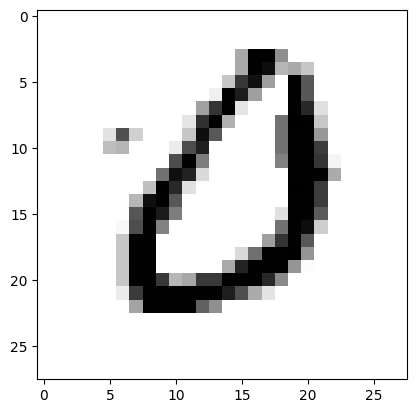

In [16]:
displayImage(x_test[predict_number])

In [17]:
displayPredict(sgd_clf,y_test_0[predict_number],x_test[predict_number])

Actually =  True
Prediction =  True


In [18]:
score = cross_val_score(sgd_clf,x_train,y_train_0,cv=5,scoring="accuracy")

In [19]:
print(score)

[0.99183333 0.98233333 0.97491667 0.97775    0.98975   ]


In [21]:
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_0,cv=5)

In [22]:
cm = confusion_matrix(y_train_0,y_train_pred)

In [23]:
print(cm)

[[53106   971]
 [  270  5653]]


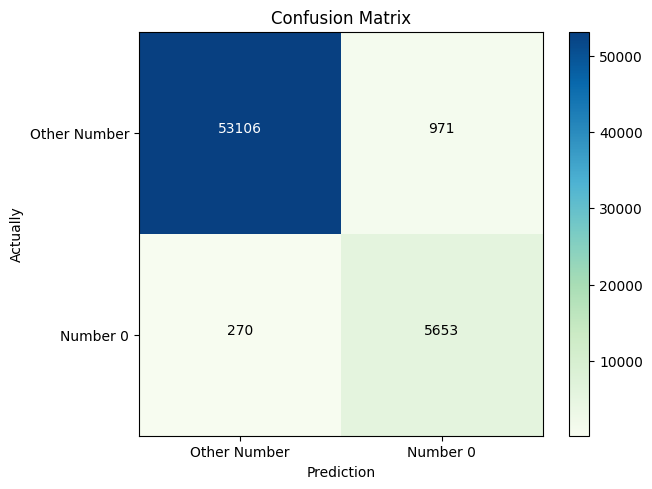

In [29]:
plt.figure()
displayConfusionMatrix(cm)